In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("Energy_consumption.csv")

In [32]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


<Axes: xlabel='DayOfWeek', ylabel='EnergyConsumption'>

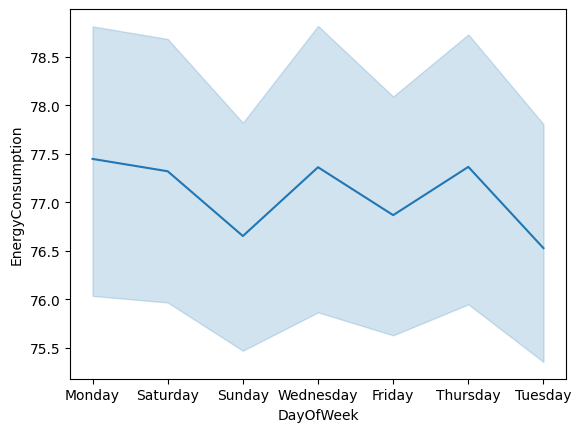

In [34]:
sns.lineplot(x="DayOfWeek",y="EnergyConsumption",data=df)

<Axes: xlabel='LightingUsage', ylabel='EnergyConsumption'>

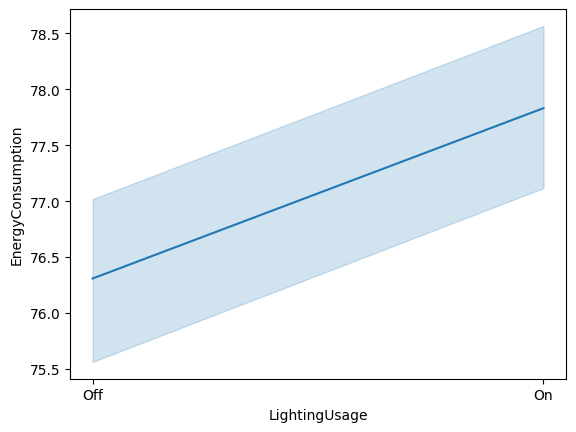

In [35]:
sns.lineplot(y="EnergyConsumption",x="LightingUsage",data=df)

<Axes: xlabel='HVACUsage', ylabel='EnergyConsumption'>

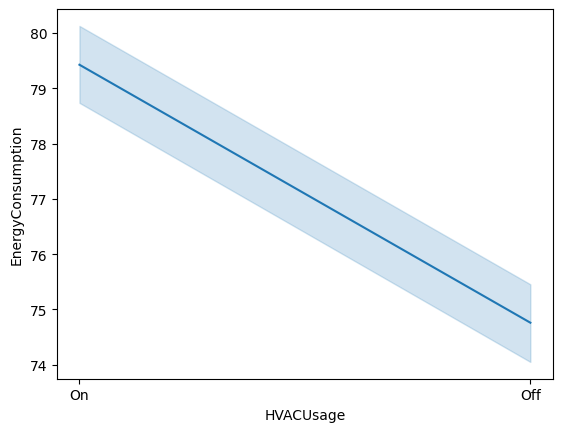

In [36]:
sns.lineplot(y="EnergyConsumption",x="HVACUsage",data=df)

<Axes: xlabel='Temperature', ylabel='EnergyConsumption'>

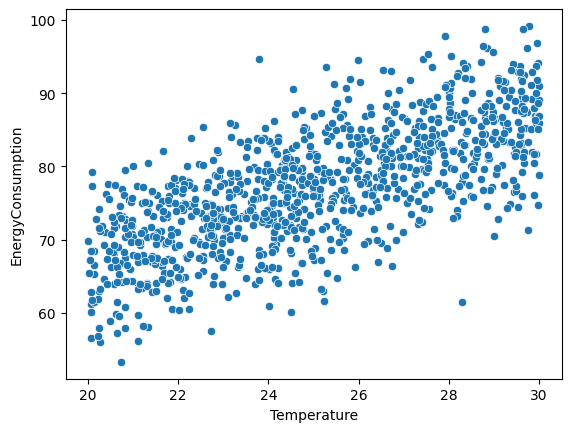

In [37]:
sns.scatterplot(y="EnergyConsumption",x="Temperature",data=df)

<Axes: xlabel='Humidity', ylabel='EnergyConsumption'>

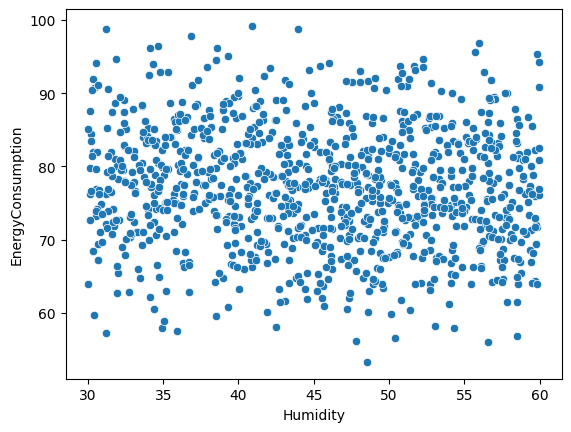

In [38]:
sns.scatterplot(y="EnergyConsumption",x="Humidity",data=df)

<Axes: xlabel='SquareFootage', ylabel='EnergyConsumption'>

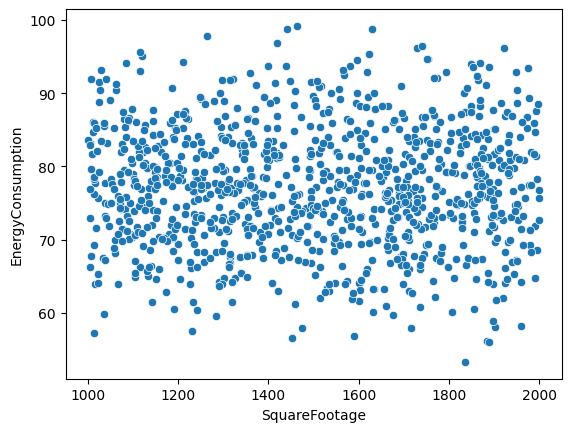

In [39]:
sns.scatterplot(y="EnergyConsumption",x="SquareFootage",data=df)

<Axes: xlabel='Occupancy', ylabel='EnergyConsumption'>

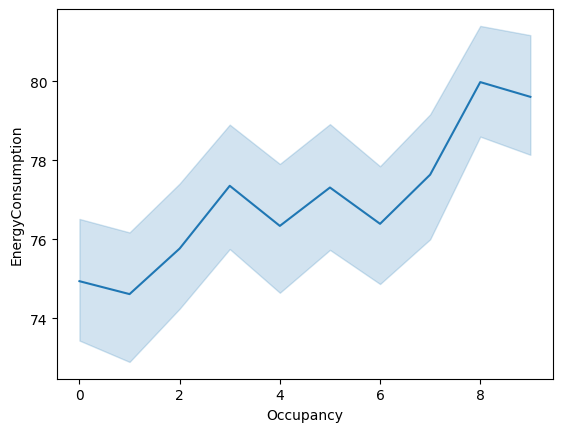

In [40]:
sns.lineplot(y="EnergyConsumption",x="Occupancy",data=df)

<Axes: xlabel='Holiday', ylabel='EnergyConsumption'>

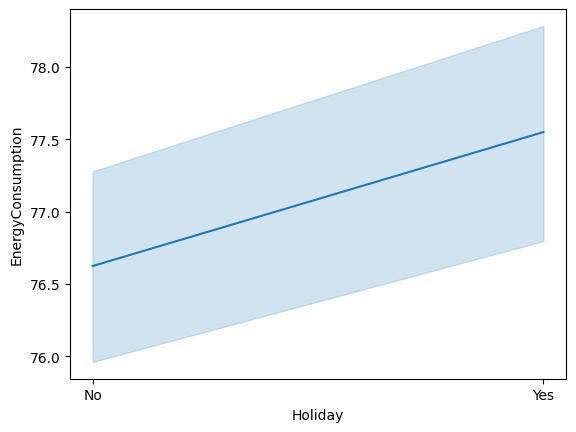

In [41]:
sns.lineplot(x="Holiday",y="EnergyConsumption",data=df)

<Axes: xlabel='RenewableEnergy', ylabel='EnergyConsumption'>

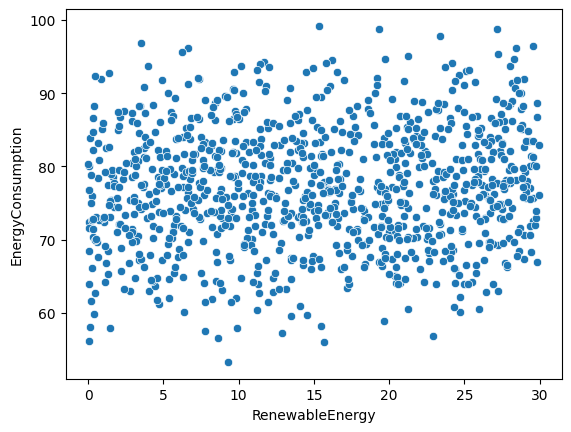

In [42]:
sns.scatterplot(x="RenewableEnergy",y="EnergyConsumption",data=df)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['HVACUsage','LightingUsage','Holiday',"DayOfWeek"]:
    df[i] = le.fit_transform(df[i])

In [44]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732


In [45]:
y = df["EnergyConsumption"]

In [46]:
X = df.drop((["EnergyConsumption","Timestamp"]),axis='columns')

In [21]:
X = df.drop((["Timestamp","Humidity","SquareFootage","RenewableEnergy","DayOfWeek","EnergyConsumption"]),axis='columns')

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
model.fit(X_train,y_train)

LinearRegression()

In [50]:
model.score(X_train,y_train)

0.6243385403034527

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test are the true values and y_pred are the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 4.108560067809039
Mean Squared Error: 26.34226315836094
Root Mean Squared Error: 5.132471447398508
R² Score: 0.5978272791753014
